
# Sentiment analysis with AUTO_NLP



Automatically Build Variant Interpretable ML models fast! Auto_ViML is pronounced "auto vimal". 
Auto_ViML was designed for building High Performance Interpretable Models with the least variables. The "V" in Auto_ViML stands for Variant because it tries Multiple Models and Multiple Features to find the best performing model for any dataset. The "i" in Auto_ViML stands for "Interpretable" since it selects the fewest features to build a simpler, more interpretable model. This is key. Some of the differentiators of Auto_ViML from other open source AutoML libraries is as follows: Auto_ViML is the package that:

Requires no data prep - you can send in your entire dataframe without a single change. It loves dirty data!
Requires no classification of variables: All other packages want you to tell them which variables are numeric, categorical, NLP text, date variables etc. autoVimal detects all of these automatically as any AutoML package should!
Does feature reduction automatically! All other packages use all the variables you send them which means they are either bloated or highly complex models. Autovimal is the only package that produces the best model with the fewest variables. That means it is very easy to interpret!
Produces charts and graphs automatically. Just set verbose to 1 or 2
Handles both text, date and numeric and categorical data all in the same model. In other packages they cannot Handle NLP. Some Cannot handle date variables. But AutoViML is the only package that uses all of them!
Auto_ViML is built using Scikit-Learn, Numpy, Pandas and Matplotlib. It should run on any Python 2 or Python 3 Anaconda installations. You won't have to import any special Libraries other than "CatBoost" and "SHAP" library for interpretability. But if you don't have these Auto_ViML will skip it and show you the regular feature importances.

In [1]:
!pip install autoviml

     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 133kB 8.5MB/s 
     |████████████████████████████████| 64.8MB 59kB/s 


In [0]:
import tensorflow as tf
import tensorflow_datasets as dtf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data,info=dtf.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info=True,batch_size=-1)

In [6]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [0]:
train_data=data['train']

In [8]:
train_data

{'data': {'customer_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
  array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object)>,
  'helpful_votes': <tf.Tensor: shape=(85981,), dtype=int32, numpy=array([0, 3, 0, ..., 0, 0, 0], dtype=int32)>,
  'marketplace': <tf.Tensor: shape=(85981,), dtype=string, numpy=array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object)>,
  'product_category': <tf.Tensor: shape=(85981,), dtype=string, numpy=
  array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object)>,
  'product_id': <tf.Tensor: shape=(85981,), dtype=string, numpy=
  array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object)>,
  'product_parent': <tf.Tensor: shape=(85981,), dtype=string, n

In [9]:
data.keys()

dict_keys(['train'])

In [0]:
train_data=dtf.as_numpy(train_data)

In [12]:
train_data

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [0]:
helpful_votes=train_data['data']['helpful_votes']
review_headlines=train_data['data']['review_headline']
review_body=train_data['data']['review_body']
rating=train_data['data']['star_rating']

In [0]:
df=pd.DataFrame(np.hstack((helpful_votes[:,None],review_headlines[:,None],review_body[:,None],rating[:,None])),columns=['votes','review','headlines','rating'])

In [50]:
df.head()

,votes,review,headlines,rating
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3


Generaly in sentiment analysis the value of rating if greater than 4 then we consider it as positive that is one else negative sentiment that is 0. 



In [0]:
df['target']=df['rating'].apply(lambda x:1 if x>=4 else 0)

In [36]:
df.head()

,votes,review,headlines,rating,target
0,0,b'These glasses are an excellent value. The fi...,"b""These glasses are an excellent value. The f...",4,1
1,3,b'A fantastic way to cheaply try straight razo...,"b""Always wanted to try straight razor shaving ...",5,1
2,0,b'Great for travel',b'I usually either throw my toothbrush in a pl...,4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance ...",3,0


In [52]:
df['rating'].value_counts()

5    48897
4    13657
1    11036
3     7050
2     5341
Name: rating, dtype: int64

In [0]:
y=df.iloc[:,4].values

In [0]:
x=df.iloc[:,[0,3]].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train,test=train_test_split(df,test_size=0.3,random_state=101)

In [0]:
from autoviml.Auto_NLP import Auto_NLP

Auto NLP processing on NLP Column: review
Shape of Train Data: 60186 rows
    Shape of Test Data: 25795 rows


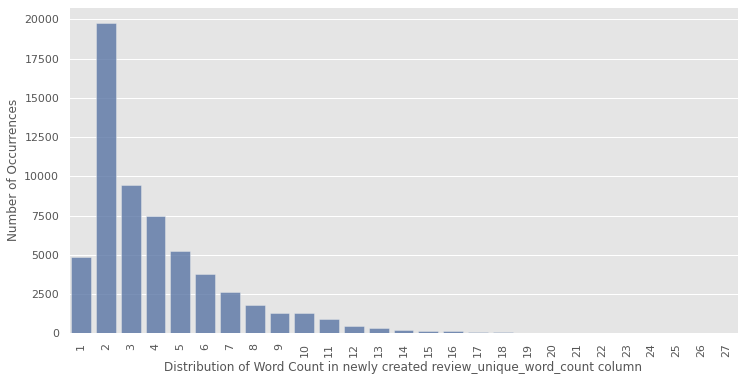

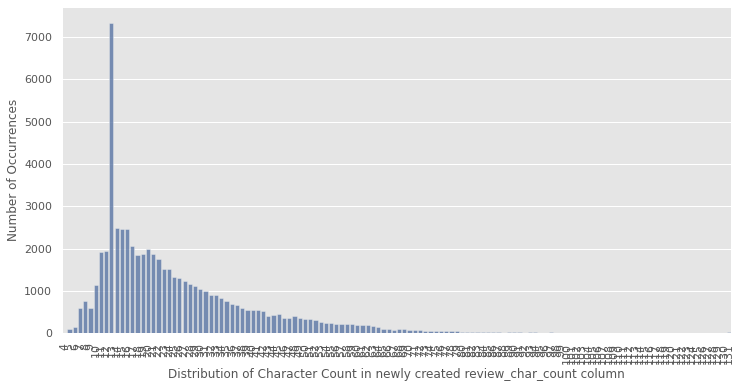

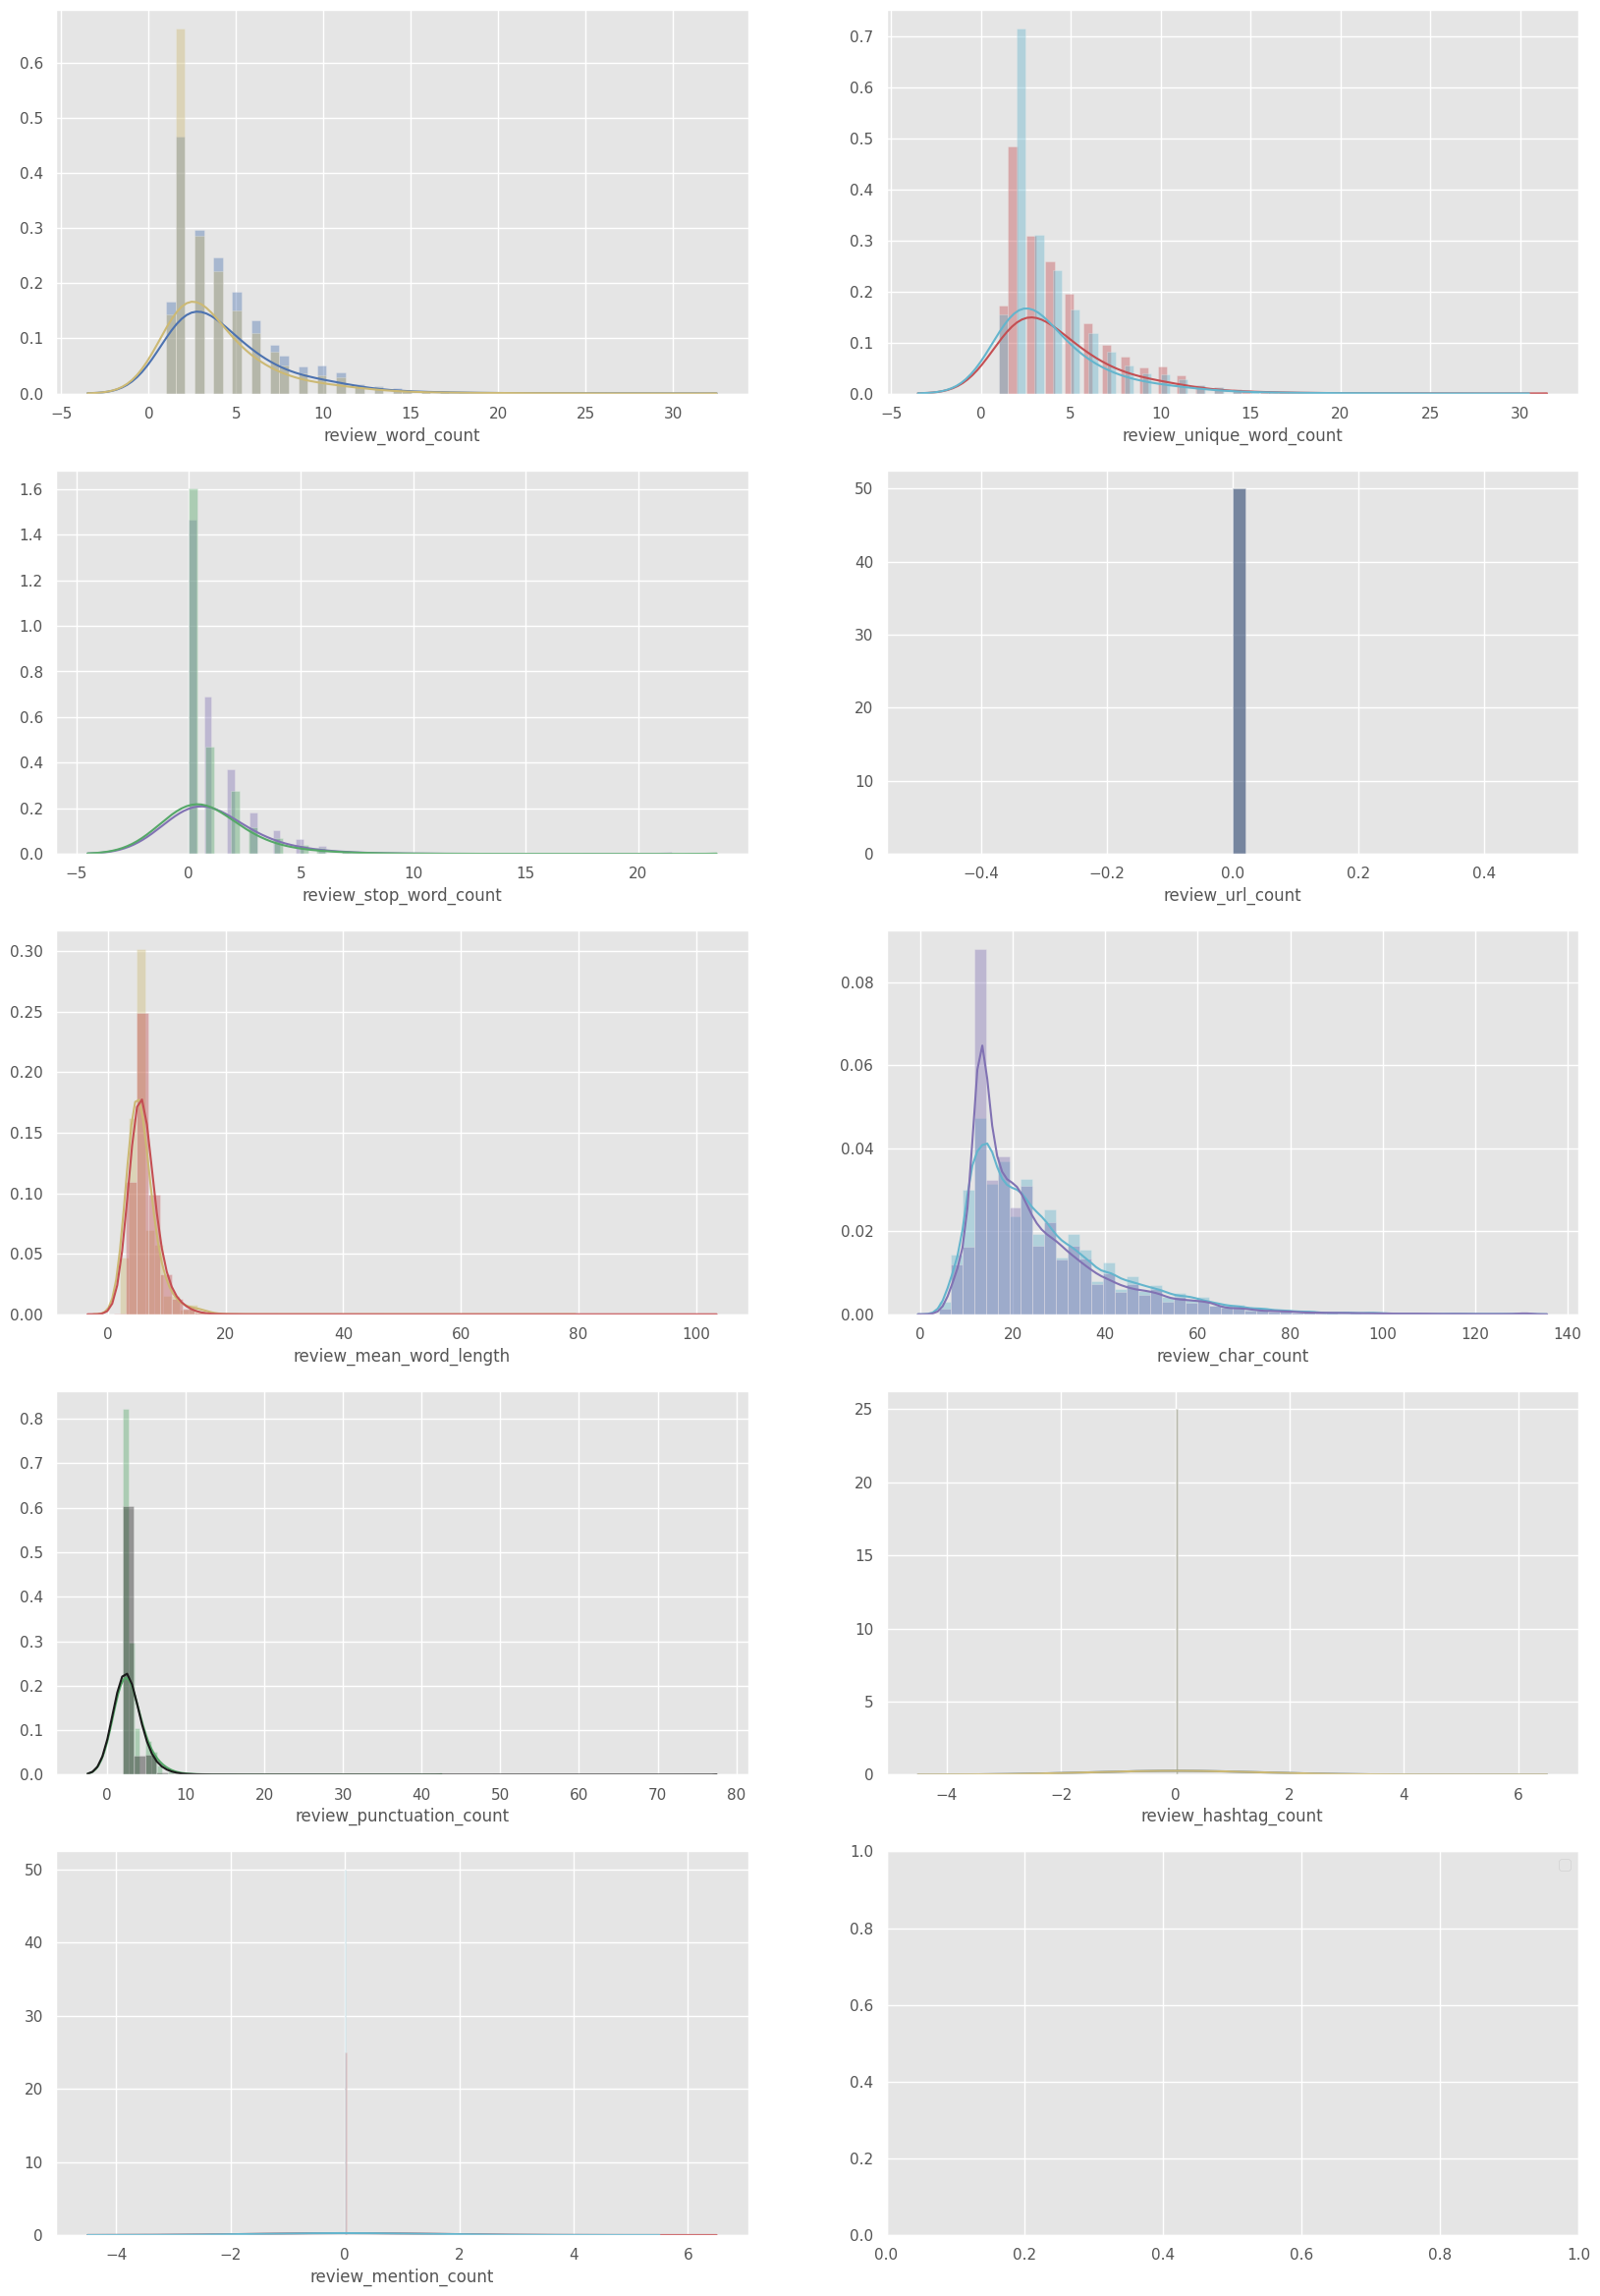

    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in review before doing transformation...


TypeError: ignored

In [55]:
nlp_columns='review'
target='target'
train_nlp,test_nlp,transformer,pred=Auto_NLP(nlp_columns,train,test,target,score_type='balanced_accuracy',modeltype='Classification',
                                             top_num_features=100,verbose=2,build_model=True)

In [0]:
nlp_transformer # it will give various pipelines used in this analysis

In [0]:
nlp_transformer.predict(test[nlp_column])